# Analysis of Life Expectancy and GDP

This project explores the relationship between **Life Expectancy** and **Gross Domestic Product (GDP)** across multiple countries.

The data for this analysis is sourced from two trusted organizations: the **World Health Organization (WHO)** and the **World Bank**, providing reliable indicators of life expectancy and economic performance across nations.

### Key Questions Explored
- **Trends Over Time**:
  - Has life expectancy increased over time in the selected countries?
  - Has GDP shown a similar upward trend over time in these countries?
  
- **Correlation Analysis**:
  - Is there a significant correlation between a country's GDP and its life expectancy?

- **Descriptive Insights**:
  - What is the average life expectancy across these nations?
  - How is life expectancy distributed across different countries?

Through these questions, we seek to highlight patterns, trends, and potential correlations between economic growth and health outcomes.


In [2]:
## Import necessary libs

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
from pandas.plotting import autocorrelation_plot
from scipy.stats import pearsonr

In [3]:
## Read in and test data
data = pd.read_csv("all_data.csv")
print(data.head())
print(data.info())
data.rename(columns={"Country":"country","Year":"year","Life expectancy at birth (years)": "life_expectancy","GDP":"gdp"}, inplace=True)
print(data.info())
print('The Life Expactancy Mean is ' + str(np.mean(data.life_expectancy)))

countries = data["country"].unique()
c_list = ', '.join(countries)
print(f"The countries contained in the dataset are: {c_list}.")


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95

Overall Statistics
Mean: 72.78958333333334
Median: 76.75
Standard Deviation: 10.6728823036079
Skewness: -1.8449349568541278
Kurtosis: 1.9396466131166679


## Comparison of GDP and Life Expectancy by Country

In this section, we start by displaying the mean life expectancy for each country. This initial overview allows us to see the average life expectancy across different nations.

Following that, we present two bar plots for a visual comparison:
- The first plot displays the average GDP for each country, sorted in descending order.
- The second plot shows the average life expectancy for each country, enabling us to observe any patterns or differences between economic performance and health outcomes.

This combined analysis provides insight into the relationship between wealth and life expectancy on a per-country basis.



In [17]:
# Overall statistics
mean = data['life_expectancy'].mean()
median = data['life_expectancy'].median()
std_dev = data['life_expectancy'].std()
skewness = data['life_expectancy'].skew()
kurtosis = data['life_expectancy'].kurtosis()
print(f"Overall Statistics")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")



# Calculate total GDP Mean per country
#gdp_by_country = data.groupby('country')['gdp'].mean().sort_values(ascending=False)
# Calculate total Life Expectancy Mean per country
#le_by_country = data.groupby('country')['life_expectancy'].mean().sort_values(ascending=False)


# Loop through life expectancy means and print each one
for country in countries:
    country_data = data[data['country'] == country]

    mean = country_data['life_expectancy'].median()
    median = country_data['life_expectancy'].median()
    std_dev = country_data['life_expectancy'].std()
    skewness = country_data['life_expectancy'].skew()
    kurtosis = country_data['life_expectancy'].kurtosis()
    min = country_data['life_expectancy'].min()
    max = country_data['life_expectancy'].max()

    print(f"{country} Life Expectancy Mean: {mean}")
    print(f"{country} Life Expectancy Median: {median}")
    print(f"{country} Life Expectancy Standard Deviation: {std_dev}")
    print(f"{country} Life Expectancy Skewness: {skewness}")
    print(f"{country} Life Expectancy Min: {max}")
    print(f"{country} Life Expectancy Max: {min}")


Overall Statistics
Mean: 72.78958333333334
Median: 76.75
Standard Deviation: 10.6728823036079
Skewness: -1.8449349568541278
Kurtosis: 1.9396466131166652
Chile Life Expectancy Mean: 79.0
Chile Life Expectancy Median: 79.0
Chile Life Expectancy Standard Deviation: 1.058910603718116
Chile Life Expectancy Skewness: -0.1844131351404798
Chile Life Expectancy Min: 80.5
Chile Life Expectancy Max: 77.3
China Life Expectancy Mean: 74.45
China Life Expectancy Median: 74.45
China Life Expectancy Standard Deviation: 1.3180161860412274
China Life Expectancy Skewness: -0.541532379121738
China Life Expectancy Min: 76.1
China Life Expectancy Max: 71.7
Germany Life Expectancy Mean: 79.85
Germany Life Expectancy Median: 79.85
Germany Life Expectancy Standard Deviation: 0.9749999999999995
Germany Life Expectancy Skewness: -0.3334243665604617
Germany Life Expectancy Min: 81.0
Germany Life Expectancy Max: 78.0
Mexico Life Expectancy Mean: 75.65
Mexico Life Expectancy Median: 75.65
Mexico Life Expectancy Sta

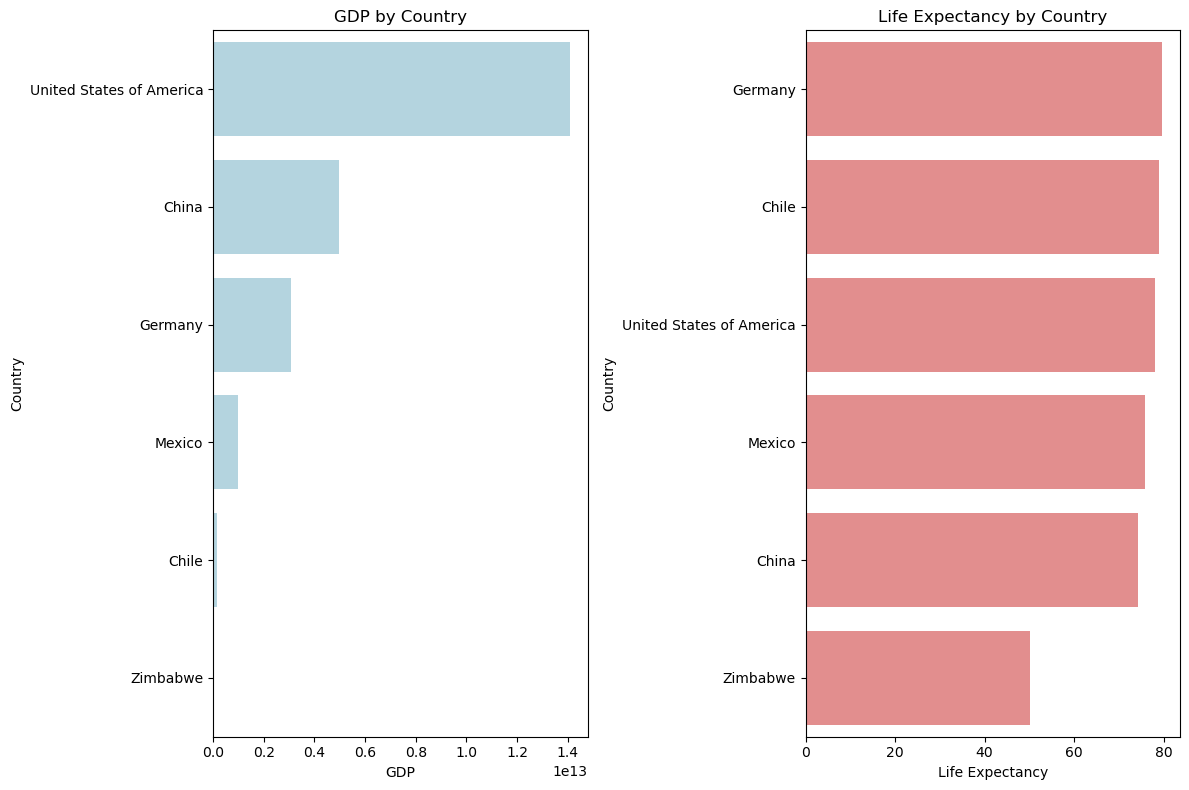

In [18]:
# Plot
plt.figure(figsize=(12, 8))
ax1=plt.subplot(1,2,1)
sns.barplot(y=gdp_by_country.index, x=gdp_by_country.values,color="lightblue")
plt.xlabel('GDP')
plt.ylabel('Country')
plt.title('GDP by Country')
ax2=plt.subplot(1,2,2)
sns.barplot(y=le_by_country.index, x=le_by_country.values,color="lightcoral")
plt.xlabel('Life Expectancy')
plt.ylabel('Country')
plt.title('Life Expectancy by Country')
plt.tight_layout()
plt.show()

## GDP and Life Expectancy Trends Over Time

The plots below illustrate trends in GDP and life expectancy across various countries over time. While life expectancy has shown a consistent upward trend in all countries, the increase in GDP has been more varied. For instance, Zimbabwe and Chile experienced relatively modest GDP growth, while China and the United States showed noticeable increases in GDP. Notably, despite its limited GDP growth, Zimbabwe saw a substantial rise in life expectancy, reflecting significant improvements in health outcomes.



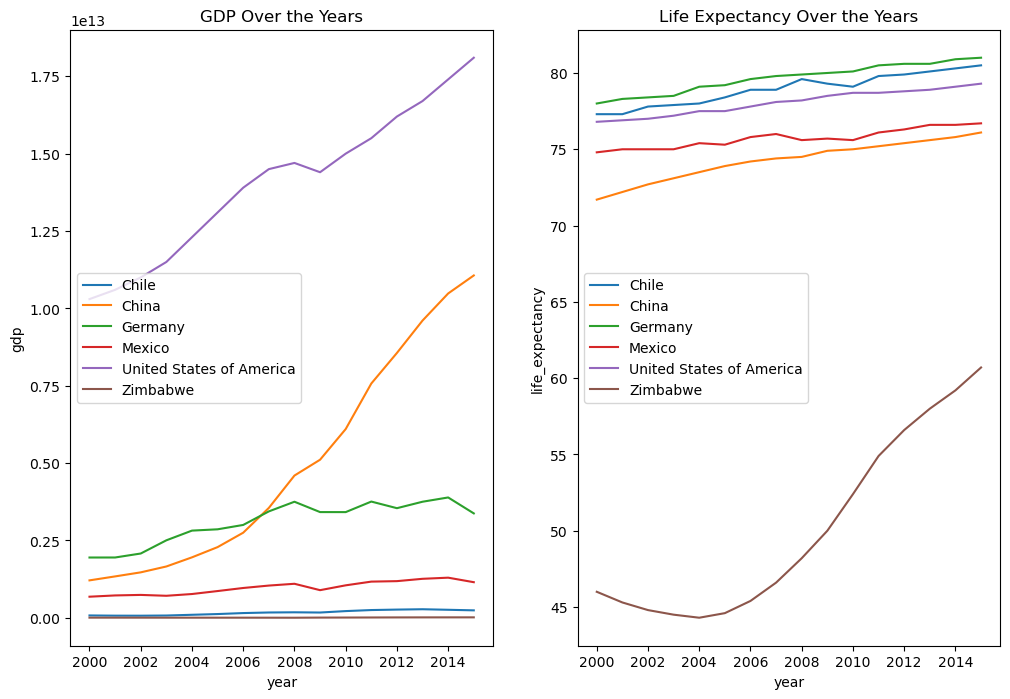

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot(1,2,1)
sns.lineplot(x="year", y="gdp", data=data, hue="country", palette="tab10")
plt.legend(loc=6)
plt.title("GDP Over the Years")
ax2= plt.subplot(1,2,2)
sns.lineplot(x="year", y="life_expectancy", data=data, hue="country", palette="tab10")
plt.title("Life Expectancy Over the Years")
plt.legend(loc=6)
plt.show()
plt.clf()

C:\Users\jbarr\AppData\Local\Temp\ipykernel_21676\2743854516.py:5: UserWarning: 
The palette list has fewer values (6) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="country", y="life_expectancy", hue="year", data=data, palette=sns.color_palette("Spectral"))


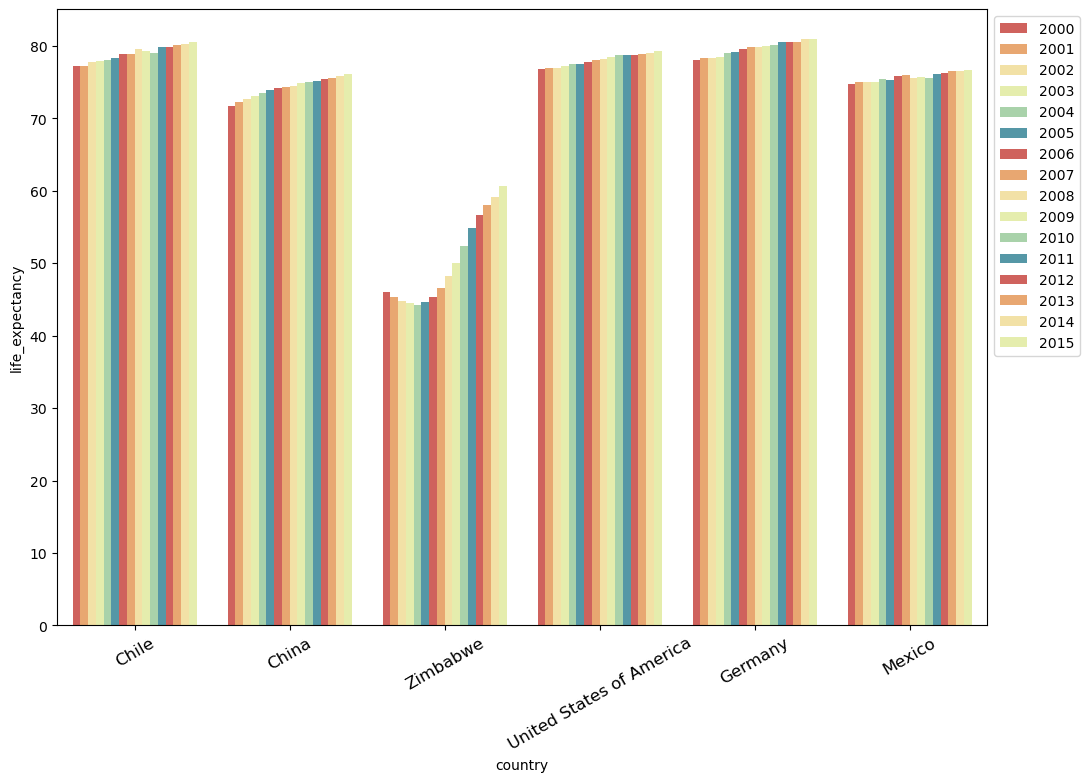

<Figure size 640x480 with 0 Axes>

In [51]:
## Life Expectancy By Country Through the Years

plt.figure(figsize=(12,8))
ax = plt.subplot() #sns.color_palette("rocket", as_cmap=True)
sns.barplot(x="country", y="life_expectancy", hue="year", data=data, palette=sns.color_palette("Spectral"))
plt.xticks(rotation=30,fontsize=12)
plt.legend(loc=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_ylabel=country
plt.show()
plt.clf()

## Life Expectancy Distribution Across Countries

This box plot provides an overview of the **gross distribution of life expectancy** across various countries. Here, "gross distribution" refers to the fact that life expectancy values are not segmented by year, showing an aggregate view instead. Each box represents the range, median, and variability of life expectancy for each country over the available data period. 

The plot highlights differences in life expectancy across countries, showcasing overall trends and identifying countries with wider distributions or outliers. This broad perspective allows us to observe which countries have higher or lower life expectancies and the degree of variability in life expectancy over time within each country.


C:\Users\jbarr\AppData\Local\Temp\ipykernel_21676\779346816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['country'],y=data['life_expectancy'], palette="Spectral")


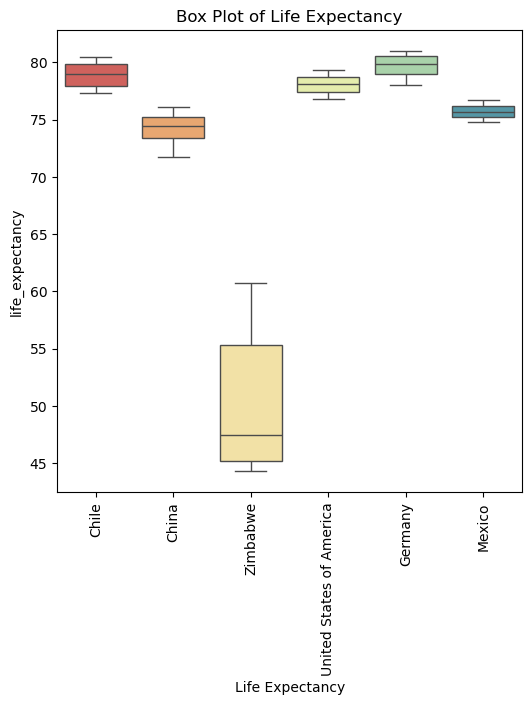

In [46]:
plt.figure(figsize=(6, 6))## data[data['country'] == country] # y=data[data['year'] == 2015]['life_expectancy'], color="blue")
sns.boxplot(x=data['country'],y=data['life_expectancy'], palette="Spectral")
plt.xticks(rotation=90,fontsize=10)
plt.title("Box Plot of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.show()

## Correlation and Autocorrelation Analysis of GDP and Life Expectancy by Country

In this section, we analyze the relationship between GDP and life expectancy across various countries, using both Pearson correlation and autocorrelation techniques.

1. **Pearson Correlation**

   We calculate the Pearson correlation coefficient between GDP and life expectancy for each country, providing a measure of the linear association between these two variables:
   - **High Positive Correlations**: the results show a strong positive correlation in all countries, with coefficients close to 1. This suggests that as GDP increases, life expectancy also tends to increase, indicating a close link between economic growth and health outcomes.
   - **Statistical Significance**: the p-values are very low (close to zero) for all countries, meaning these correlations are statistically significant and unlikely to be due to chance.

   These results suggest that GDP and life expectancy are closely linked across these countries, possibly reflecting improved health outcomes as economic conditions improve.

2. **Autocorrelation Analysis**

   We examine the autocorrelation of GDP and life expectancy within each country to detect any temporal patterns:
   - **Autocorrelation Patterns**: the autocorrelation plots for both GDP and life expectancy generally start close to 1 and decay to 0. This pattern suggests that the values are strongly correlated with their immediate past but lose that correlation as time progresses.

   This combined analysis provides insights into both the cross-sectional relationship between GDP and life expectancy and the internal time-based dependencies for each country, highlighting how closely these two metrics are associated both within and across time.


The Pearson Correlation for Chile is 0.9499 with a p-value of 1.8659e-08
The Pearson Correlation for China is 0.9085 with a p-value of 1.1251e-06
The Pearson Correlation for Germany is 0.9327 with a p-value of 1.4019e-07
The Pearson Correlation for Mexico is 0.9322 with a p-value of 1.4687e-07
The Pearson Correlation for United States of America is 0.9817 with a p-value of 1.7500e-11
The Pearson Correlation for Zimbabwe is 0.9662 with a p-value of 1.2359e-09


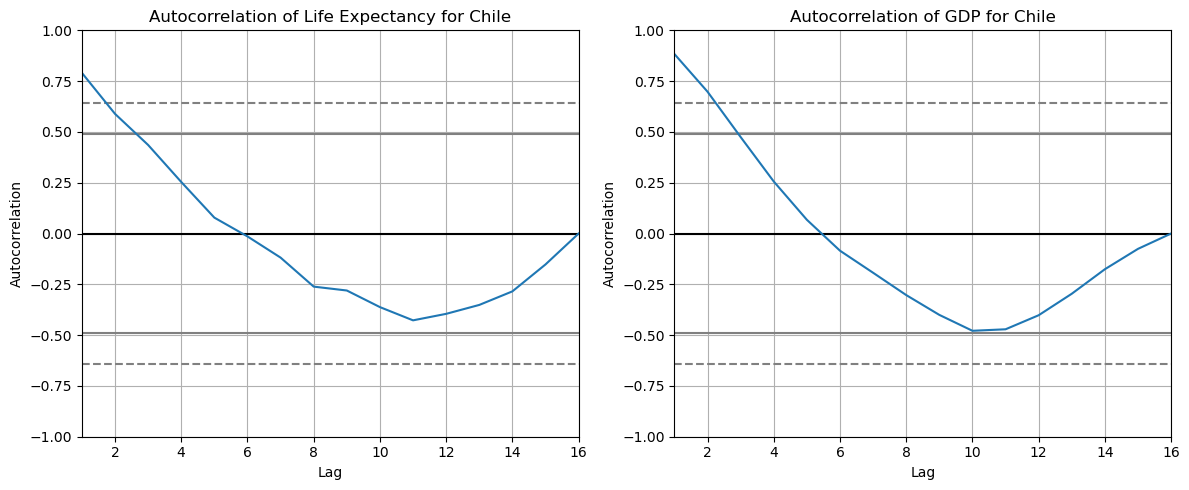

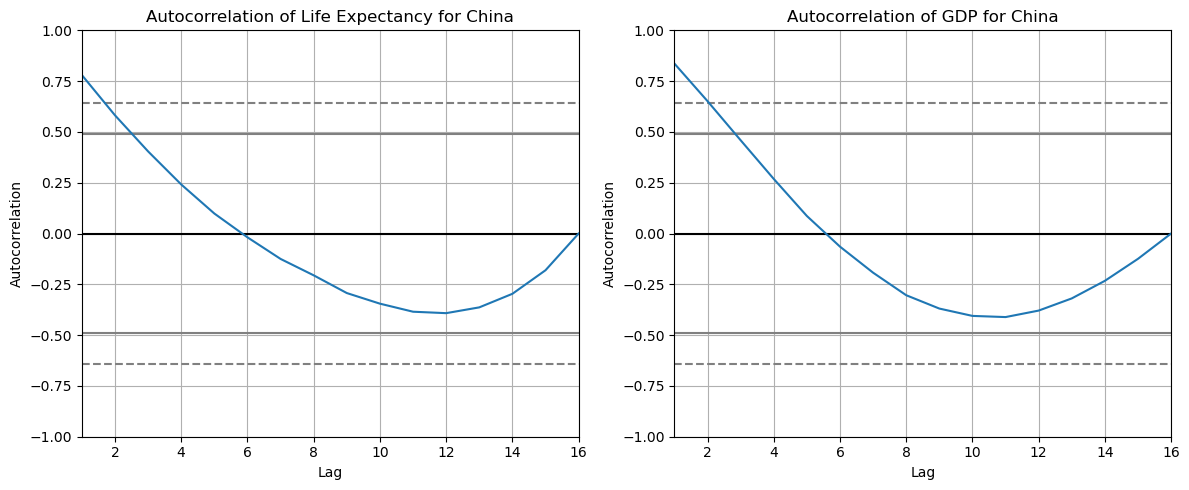

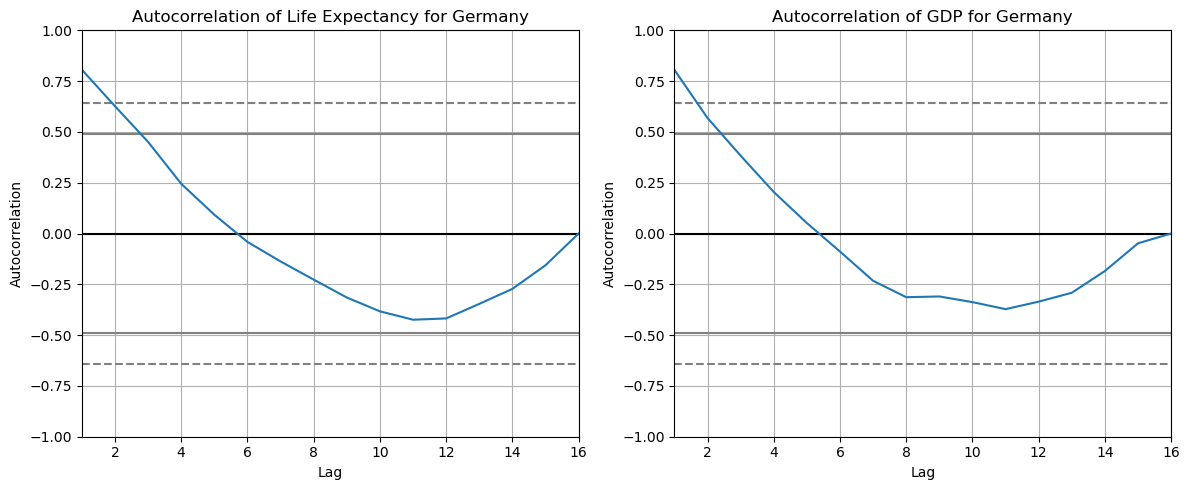

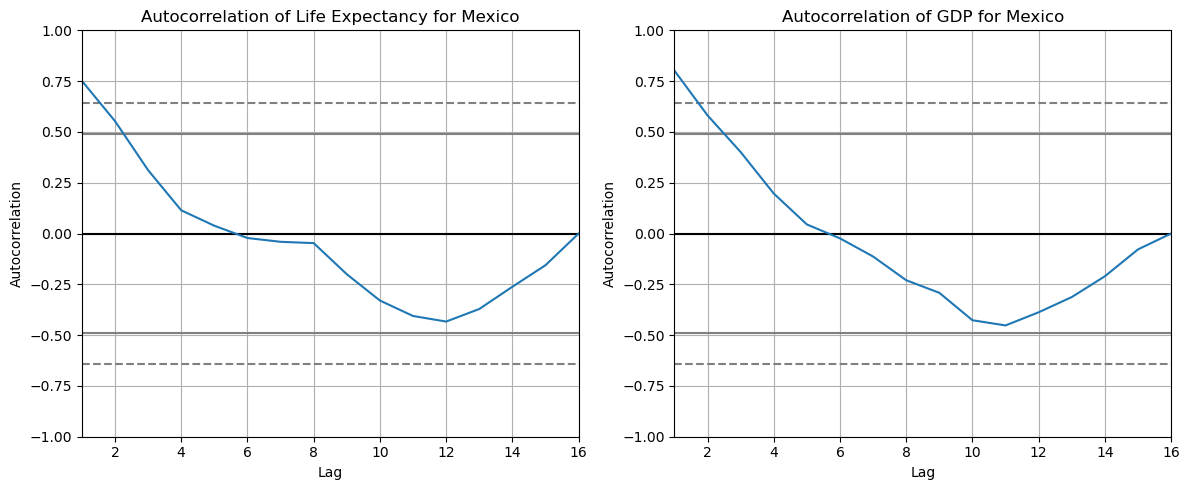

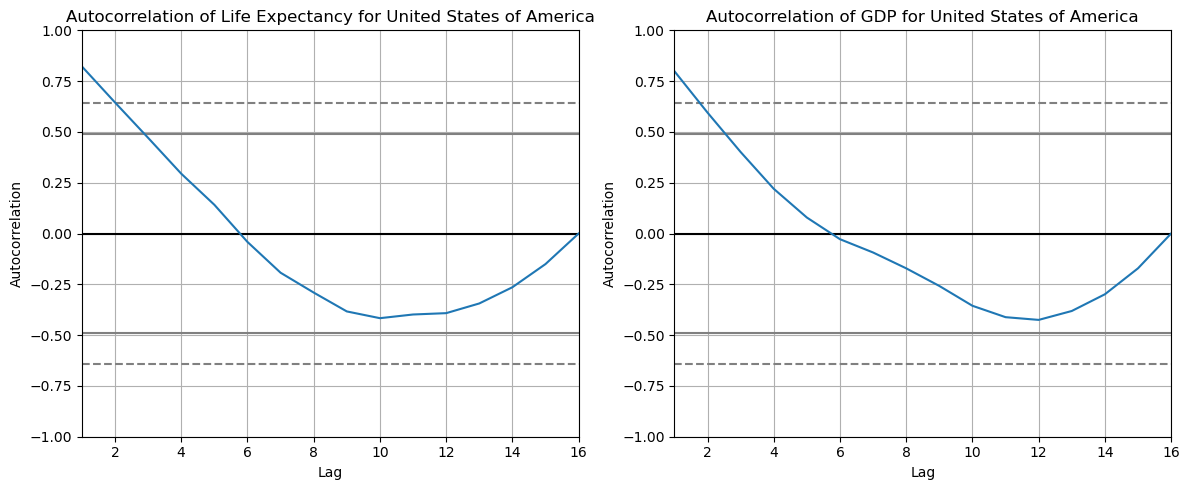

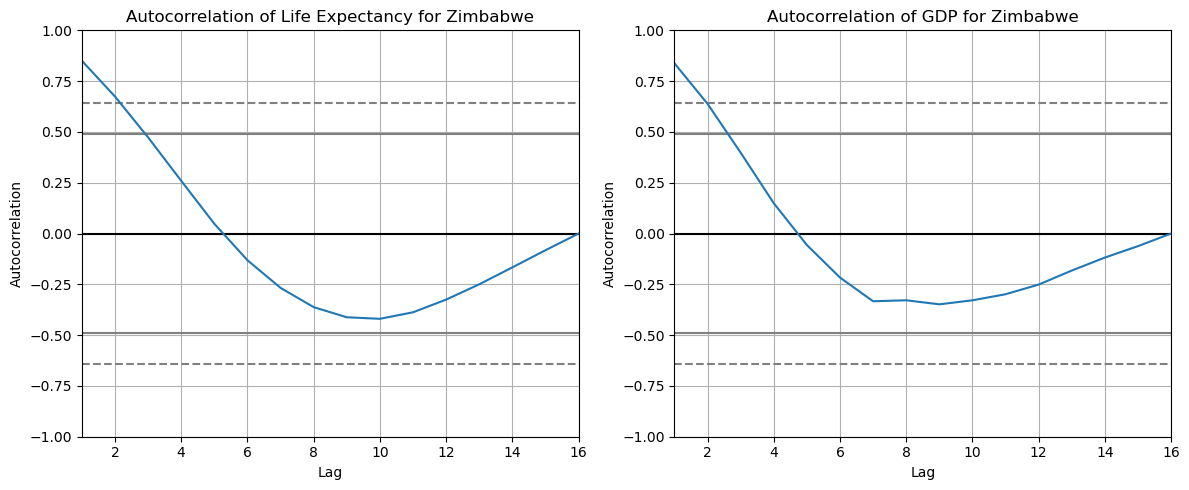

In [10]:
data = data.sort_values(by='year')
for country in countries:
    country_data = data[data['country'] == country]
    corr_gdp_life_expectancy,p = pearsonr(country_data['life_expectancy'],country_data['gdp'])
    print(f"The Pearson Correlation for {country} is {corr_gdp_life_expectancy:.4f} with a p-value of {p:.4e}")


for country in countries:
    # Filter data for the specific country
    country_data = data[data['country'] == country]
    
    # Create a new figure for each country
    plt.figure(figsize=(12, 5))
    
    # Plot autocorrelation for life expectancy
    plt.subplot(1, 2, 1)
    autocorrelation_plot(country_data['life_expectancy'])
    plt.title(f"Autocorrelation of Life Expectancy for {country}")
    
    # Plot autocorrelation for GDP
    plt.subplot(1, 2, 2)
    autocorrelation_plot(country_data['gdp'])
    plt.title(f"Autocorrelation of GDP for {country}")
    
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


